# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
print(f'Cities List: {len(cities)}')

#use below to work on code before using longer list and pushing api call limit
cities1=cities[0:15]
print(f'Cities1 List:{len(cities1)}')

Cities List: 632
Cities1 List:15


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
Cit=[]
Clouds=[]
Country=[]
Humidity=[]
Lat=[]
Lon=[]
MaxTemp=[]
MinTemp=[]
WindSpeed=[]
Err=0 #error counter

units='Imperial'
for city in cities: #change to 'cities1' to run short list or to 'cities' to run full list
    url=f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q={city}'
    try:
        CityData=requests.get(url).json()
        Cit.append(CityData['name'])
        Clouds.append(CityData['clouds']['all'])
        Country.append(CityData['sys']['country'])
        Humidity.append(CityData['main']['humidity'])
        Lat.append(CityData['coord']['lat'])
        Lon.append(CityData['coord']['lon'])
        MaxTemp.append(CityData['main']['temp_max'])
        WindSpeed.append(CityData['wind']['speed'])
        print(f'{len(Cit)+Err}/{len(cities)}: Gathering data for {city}...')
    except:
        Err+=1
        print(f'{len(Cit)+Err}/{len(cities)}: Gathering data for {city}...(Not Found)')
print(f'{Err} cities not found')
    

1/632: Gathering data for georgetown...
2/632: Gathering data for whitehorse...
3/632: Gathering data for ossora...
4/632: Gathering data for victoria...
5/632: Gathering data for pangai...
6/632: Gathering data for ushuaia...
7/632: Gathering data for saint-philippe...
8/632: Gathering data for beringovskiy...
9/632: Gathering data for talnakh...
10/632: Gathering data for taolanaro...(Not Found)
11/632: Gathering data for port elizabeth...
12/632: Gathering data for rikitea...
13/632: Gathering data for alghero...
14/632: Gathering data for khatanga...
15/632: Gathering data for mataura...
16/632: Gathering data for bengkulu...
17/632: Gathering data for chupa...
18/632: Gathering data for cigand...
19/632: Gathering data for kaitangata...
20/632: Gathering data for busselton...
21/632: Gathering data for namatanai...
22/632: Gathering data for punta arenas...
23/632: Gathering data for palabuhanratu...(Not Found)
24/632: Gathering data for avarua...
25/632: Gathering data for herman

200/632: Gathering data for dobson...
201/632: Gathering data for yulara...
202/632: Gathering data for brae...
203/632: Gathering data for talara...
204/632: Gathering data for poroshkovo...
205/632: Gathering data for hami...
206/632: Gathering data for igarka...
207/632: Gathering data for cabo san lucas...
208/632: Gathering data for olafsvik...
209/632: Gathering data for vathi...
210/632: Gathering data for beloha...
211/632: Gathering data for lovington...
212/632: Gathering data for rawson...
213/632: Gathering data for juneau...
214/632: Gathering data for den helder...
215/632: Gathering data for miles city...
216/632: Gathering data for karratha...
217/632: Gathering data for katobu...
218/632: Gathering data for cuiluan...
219/632: Gathering data for haines junction...
220/632: Gathering data for katsuura...
221/632: Gathering data for thompson...
222/632: Gathering data for kasra...(Not Found)
223/632: Gathering data for bulungu...
224/632: Gathering data for satuk...
225/

401/632: Gathering data for havoysund...
402/632: Gathering data for marmarion...
403/632: Gathering data for novoseleznevo...
404/632: Gathering data for grass valley...
405/632: Gathering data for galle...
406/632: Gathering data for dingle...
407/632: Gathering data for goderich...
408/632: Gathering data for blackpool...
409/632: Gathering data for barcelos...
410/632: Gathering data for lubango...
411/632: Gathering data for vieux fort...
412/632: Gathering data for tulsipur...
413/632: Gathering data for guerrero negro...
414/632: Gathering data for sari...
415/632: Gathering data for vetluzhskiy...
416/632: Gathering data for carndonagh...
417/632: Gathering data for kamaishi...
418/632: Gathering data for aswan...
419/632: Gathering data for filadelfia...
420/632: Gathering data for selty...
421/632: Gathering data for sao desiderio...
422/632: Gathering data for cherskiy...
423/632: Gathering data for san jose...
424/632: Gathering data for terra santa...
425/632: Gathering da

602/632: Gathering data for excelsior springs...
603/632: Gathering data for vestmannaeyjar...
604/632: Gathering data for kampene...
605/632: Gathering data for strezhevoy...
606/632: Gathering data for languyan...
607/632: Gathering data for abu samrah...
608/632: Gathering data for ghanzi...
609/632: Gathering data for capinopolis...
610/632: Gathering data for mariental...
611/632: Gathering data for santa maria...
612/632: Gathering data for marsabit...
613/632: Gathering data for tashla...
614/632: Gathering data for comodoro rivadavia...
615/632: Gathering data for ainazi...
616/632: Gathering data for burnie...
617/632: Gathering data for zyryanka...
618/632: Gathering data for qixingtai...
619/632: Gathering data for padang...
620/632: Gathering data for porto novo...
621/632: Gathering data for sola...
622/632: Gathering data for valera...
623/632: Gathering data for opuwo...
624/632: Gathering data for lardos...
625/632: Gathering data for roald...
626/632: Gathering data fo

The Double printing above is fixed but my API key has been disabled so I cannot run the cell again without error

In [4]:
weather={'City':Cit,
        'Country':Country,
        'Lat':Lat,
        'Lng':Lon,
        'Cloudiness':Clouds,
        'Humidity':Humidity,
         'High Temp':MaxTemp,
         'Wind Speed':WindSpeed
        }

WeatherDF=pd.DataFrame(weather)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
WeatherDF.to_csv('WeatherData.csv')
WeatherDF

,City,Country,Lat,Lng,Cloudiness,Humidity,High Temp,Wind Speed
0,George Town,MY,5.41,100.34,20,94,78.80,5.82
1,Whitehorse,CA,60.72,-135.05,90,92,26.60,8.05
2,Ossora,RU,59.24,163.07,100,66,2.26,20.36
3,Hong Kong,HK,22.29,114.16,40,68,64.99,8.05
4,Pangai,TO,-19.80,-174.35,100,82,80.91,18.21
...,...,...,...,...,...,...,...,...
572,Tibati,CM,6.47,12.63,0,12,95.40,12.44
573,Santiago del Estero,AR,-27.80,-64.26,100,79,65.50,3.40
574,Jiayuguan,CN,39.82,98.30,0,19,33.26,8.21
575,Batagay-Alyta,RU,67.80,130.41,18,96,-29.81,3.47


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

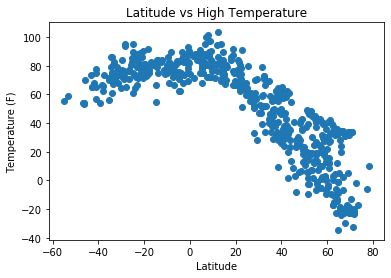

In [22]:
x_values = WeatherDF['Lat']
y_values = WeatherDF['High Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Latitude vs High Temperature')
plt.savefig('LattitudevsHighTemp.png')
plt.show()

Showing the relationship between Latitude and High Temperature

#### Latitude vs. Humidity Plot

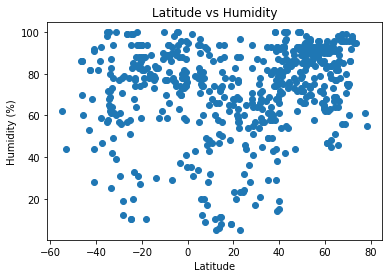

In [23]:
x_values = WeatherDF['Lat']
y_values = WeatherDF['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity')
plt.savefig('LattitudevsHumidity.png')
plt.show()

Showing the relationship between Latitude and Humidity

#### Latitude vs. Cloudiness Plot

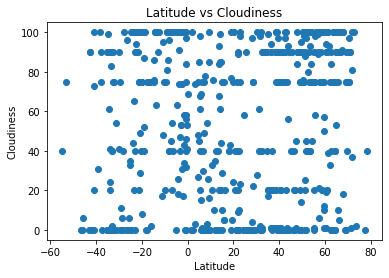

In [24]:
x_values = WeatherDF['Lat']
y_values = WeatherDF['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.savefig('LattitudevsCloudiness.png')
plt.show()

Showing the relationship between Latitude and Cloudiness

#### Latitude vs. Wind Speed Plot

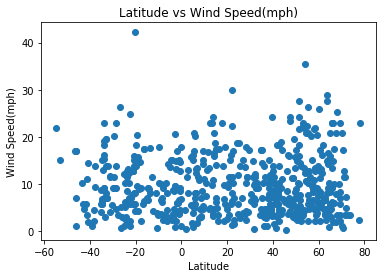

In [25]:
x_values = WeatherDF['Lat']
y_values = WeatherDF['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Latitude vs Wind Speed(mph)')
plt.savefig('LattitudevsWindSpeed.png')
plt.show()

Showing the relationship between Latitude and Wind Speed

## Linear Regression

In [26]:
# Create Northern and Southern Hemisphere DataFrames
NorthDF=WeatherDF.loc[(WeatherDF['Lat']>=0)]
SouthDF=WeatherDF.loc[(WeatherDF['Lat']<0)]
print(f'{len(NorthDF)} + {len(SouthDF)} = {len(NorthDF)+len(SouthDF)}')#Showing the size of each DF

395 + 182 = 577


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

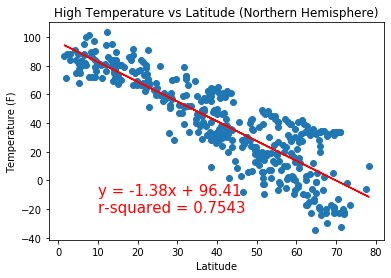

In [27]:
xs = NorthDF['Lat']
ys = NorthDF['High Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs, ys)
regress = xs * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_2 = "r-squared = " + str(round(rvalue**2,4))
plt.scatter(xs,ys)
plt.plot(xs,regress,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
plt.annotate(r_2,(10,-22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('High Temperature vs Latitude (Northern Hemisphere)')
plt.savefig('LattitudevsHighTempNorth.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

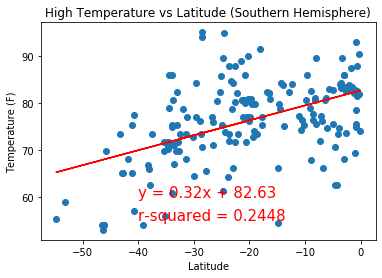

In [28]:
xs = SouthDF['Lat']
ys = SouthDF['High Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs, ys)
regress = xs * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_2 = "r-squared = " + str(round(rvalue**2,4))
plt.scatter(xs,ys)
plt.plot(xs,regress,"r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")
plt.annotate(r_2,(-40,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('High Temperature vs Latitude (Southern Hemisphere)')
plt.savefig('LattitudevsHighTempSouth.png')
plt.show()


There is a clear correlation between Latitude and Temperature. The relationship is either positive or negative depending on which hemisphere one is observing. The further away one moves from the equator, the colder it gets.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

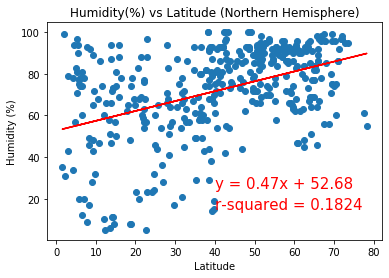

In [29]:
xs = NorthDF['Lat']
ys = NorthDF['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs, ys)
regress = xs * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_2 = "r-squared = " + str(round(rvalue**2,4))
plt.scatter(xs,ys)
plt.plot(xs,regress,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.annotate(r_2,(40,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity(%) vs Latitude (Northern Hemisphere)')
plt.savefig('LattitudevsHumidityNorth.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

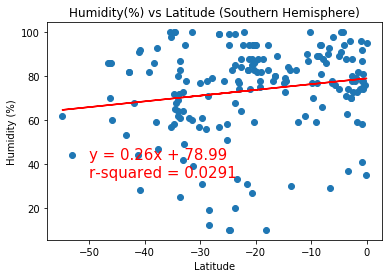

In [30]:
xs = SouthDF['Lat']
ys = SouthDF['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs, ys)
regress = xs * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_2 = "r-squared = " + str(round(rvalue**2,4))
plt.scatter(xs,ys)
plt.plot(xs,regress,"r-")
plt.annotate(line_eq,(-50,42),fontsize=15,color="red")
plt.annotate(r_2,(-50,34),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity(%) vs Latitude (Southern Hemisphere)')
plt.savefig('LattitudevsHumiditySouth.png')
plt.show()

There is not a significant correlation between Latitude and Humidity in either Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

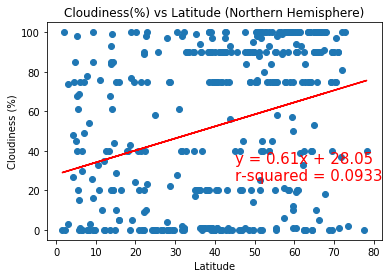

In [31]:
xs = NorthDF['Lat']
ys = NorthDF['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs, ys)
regress = xs * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_2 = "r-squared = " + str(round(rvalue**2,4))
plt.scatter(xs,ys)
plt.plot(xs,regress,"r-")
plt.annotate(line_eq,(45,34),fontsize=15,color="red")
plt.annotate(r_2,(45,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness(%) vs Latitude (Northern Hemisphere)')
plt.savefig('LattitudevsCloudinessNorth.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

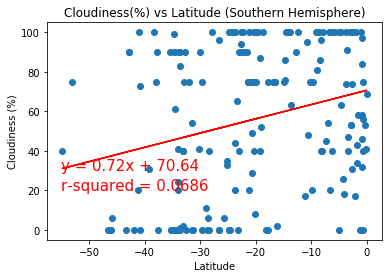

In [32]:
xs = SouthDF['Lat']
ys = SouthDF['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs, ys)
regress = xs * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_2 = "r-squared = " + str(round(rvalue**2,4))
plt.scatter(xs,ys)
plt.plot(xs,regress,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.annotate(r_2,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness(%) vs Latitude (Southern Hemisphere)')
plt.savefig('LattitudevsCloudinessSouth.png')
plt.show()

There is no significant correlation between Latitude and Cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

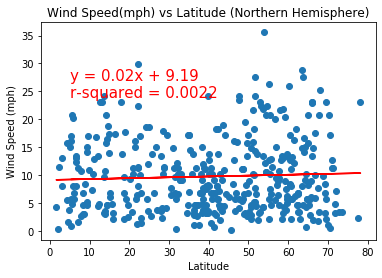

In [33]:
xs = NorthDF['Lat']
ys = NorthDF['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs, ys)
regress = xs * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_2 = "r-squared = " + str(round(rvalue**2,4))
plt.scatter(xs,ys)
plt.plot(xs,regress,"r-")
plt.annotate(line_eq,(5,27),fontsize=15,color="red")
plt.annotate(r_2,(5,24),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed(mph) vs Latitude (Northern Hemisphere)')
plt.savefig('LattitudevsWindSpeedNorth.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

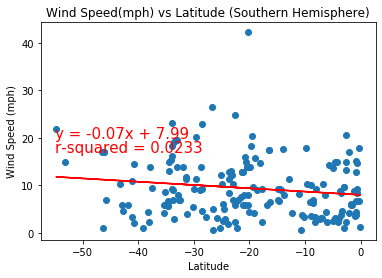

In [34]:
xs = SouthDF['Lat']
ys = SouthDF['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs, ys)
regress = xs * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_2 = "r-squared = " + str(round(rvalue**2,4))
plt.scatter(xs,ys)
plt.plot(xs,regress,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.annotate(r_2,(-55,17),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed(mph) vs Latitude (Southern Hemisphere)')
plt.savefig('LattitudevsWindSpeedSouth.png')
plt.show()

There is no significant correlation between Latitude and Wind Speed.